In [35]:
# Random Forest algorithm to classify network traffic 

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [38]:
df = pd.read_csv("KaggleImbalanced.csv")
df.sample(5)

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName
284154,3.232292e+09,51064.0,180881157.0,3128.0,6.0,1124245.0,9.0,11.0,1307.0,7310.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125.0,SKYPE
181452,3.232259e+09,2100.0,180881160.0,3128.0,6.0,674.0,1.0,1.0,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0,HTTP_PROXY
230884,3.232292e+09,50251.0,180881160.0,3128.0,6.0,1664.0,1.0,1.0,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,MSN
121174,3.232244e+09,55817.0,180881160.0,3128.0,6.0,1001.0,1.0,1.0,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.0,GMAIL
405932,3.232238e+09,49798.0,180881159.0,3128.0,6.0,1999426.0,17.0,19.0,1796.0,11200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,YAHOO


In [39]:
feats = [x for x in df.columns if x != 'ProtocolName']
X = df[feats]
Y = df['ProtocolName']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [41]:
dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)

DecisionTreeClassifier()

In [42]:
dt.tree_.node_count, dt.tree_.max_depth

(105, 17)

In [43]:
dt.score(X_test, y_test)

1.0

In [44]:
rf = RandomForestClassifier()
rf.fit(X_train , y_train)

RandomForestClassifier()

In [ ]:
rf.base_estimator_.tree_.node_count, rf.tree_.max_depth

In [12]:
rf.score(X_test, y_test)

0.9839874436191548

In [13]:
model = RandomForestClassifier()
param_grid = {'max_depth':[30,40,50],
              'n_estimators':[20,30,40,50],  
              'max_features':['auto','log2'],
              'criterion':['gini','entropy']}
GR = GridSearchCV(estimator = model, param_grid = param_grid, scoring='accuracy', cv=6)

In [ ]:
GR.fit(X, Y)

In [ ]:
GR.best_score_

In [ ]:
GR.best_params_

In [16]:
rf = RandomForestClassifier(max_depth=60, n_estimators=100, max_features='auto', criterion='entropy')

In [17]:
%%time
rf.fit(X_train, y_train)

CPU times: user 6min, sys: 3.63 s, total: 6min 4s
Wall time: 6min 19s


RandomForestClassifier(criterion='entropy', max_depth=60)

In [18]:
%%time
rf.score(X_test, y_test)

CPU times: user 3.6 s, sys: 826 ms, total: 4.42 s
Wall time: 4.94 s


0.9864289621168283

In [19]:
%%time
y_pred = rf.predict(X_test)

CPU times: user 3.27 s, sys: 404 ms, total: 3.68 s
Wall time: 3.92 s


In [20]:
print(classification_report(y_test, y_pred))

/opt/anaconda3/envs/torch-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/torch-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

           AMAZON       0.97      0.97      0.97      2958
            APPLE       0.99      0.99      0.99      2977
     APPLE_ICLOUD       1.00      1.00      1.00      2950
     APPLE_ITUNES       1.00      1.00      1.00      3062
    CITRIX_ONLINE       1.00      1.00      1.00        11
       CLOUDFLARE       1.00      1.00      1.00      3046
    CONTENT_FLASH       1.00      1.00      1.00      2950
           DEEZER       1.00      0.44      0.62        18
              DNS       1.00      1.00      1.00      2990
          DROPBOX       0.99      0.95      0.97      3028
         EASYTAXI       0.99      1.00      0.99      3083
             EBAY       0.99      0.99      0.99      3025
          EDONKEY       1.00      0.67      0.80        27
         FACEBOOK       0.97      0.98      0.97      2932
      FTP_CONTROL       1.00      1.00      1.00         9
         FTP_DATA       0.99      1.00      1.00      3

/opt/anaconda3/envs/torch-gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

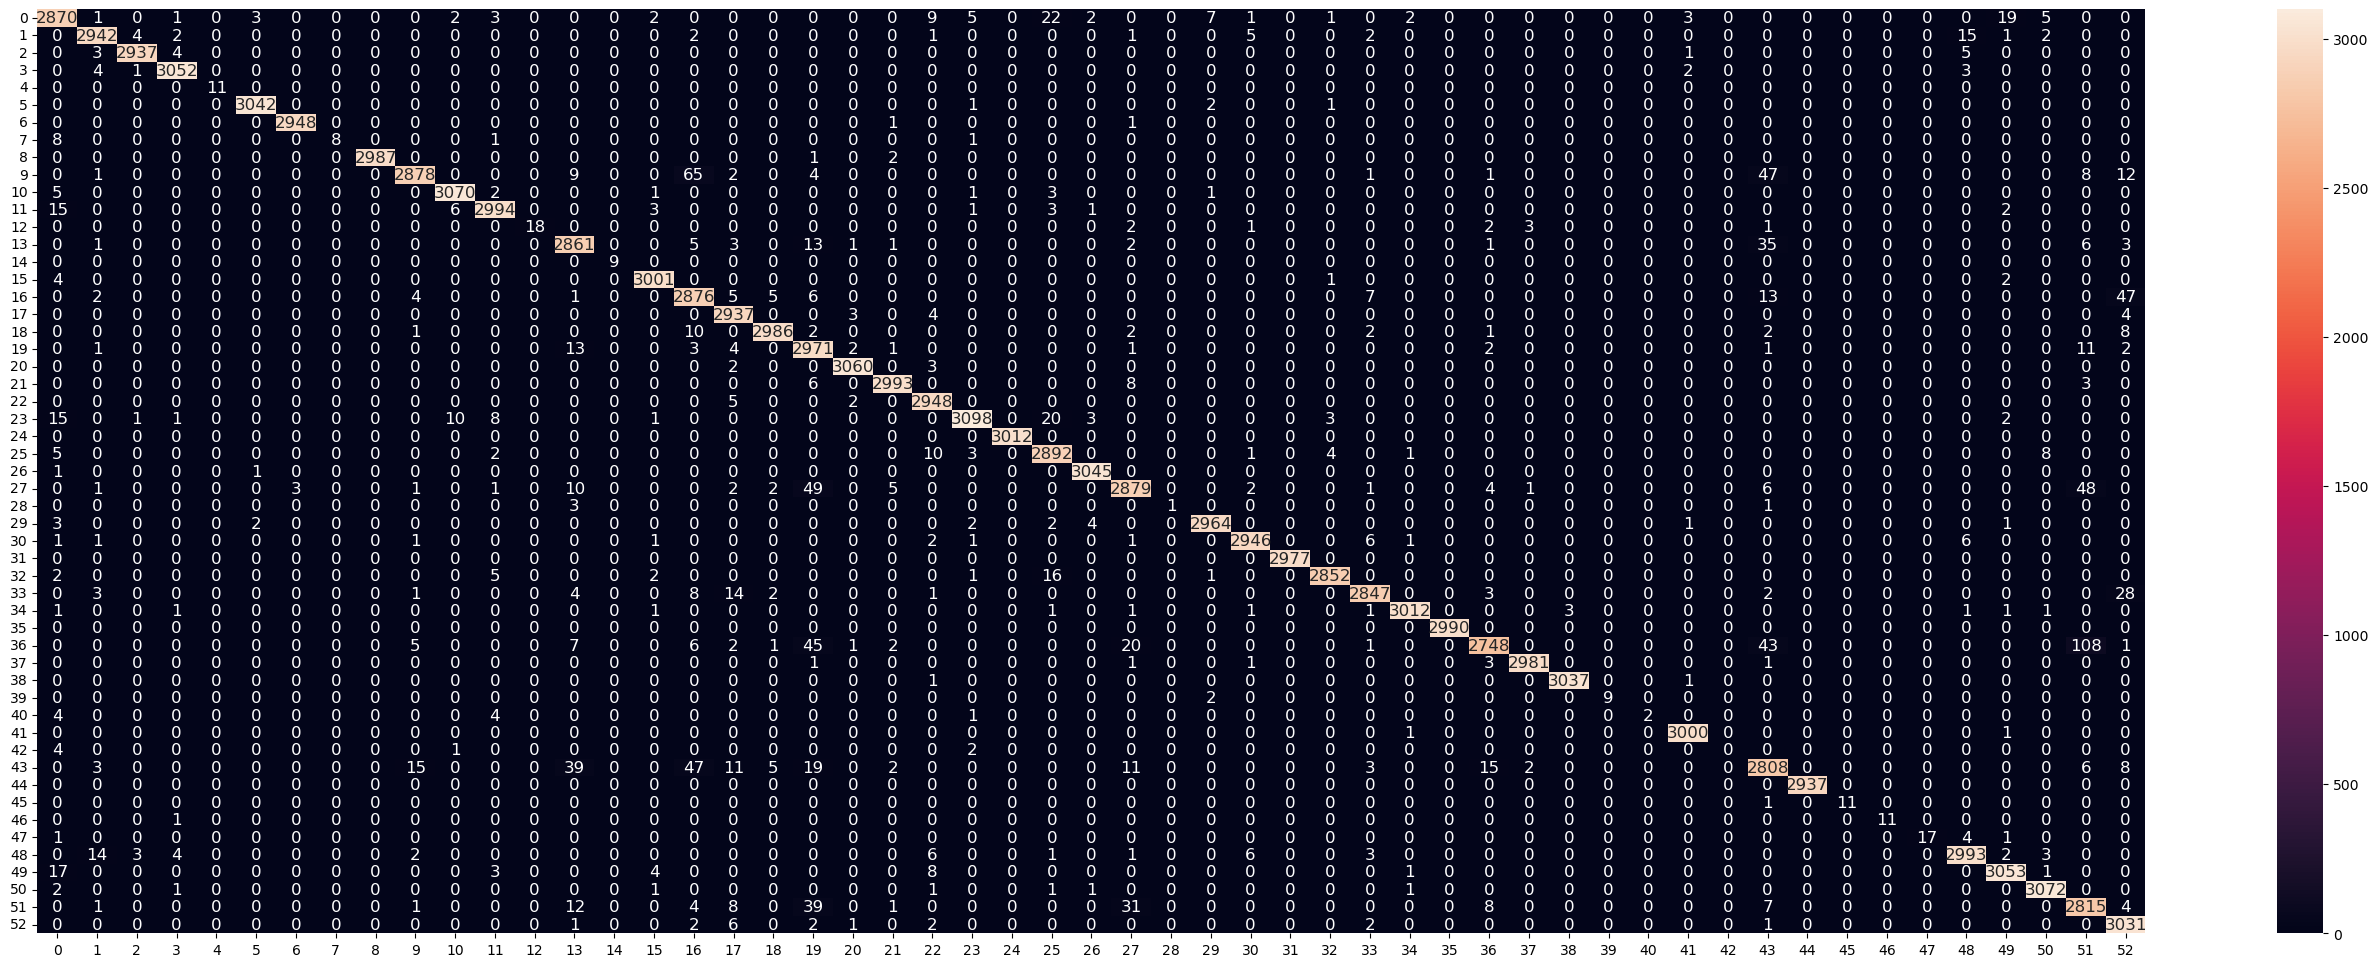

In [21]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(34,12)) 
sns.heatmap(cf_matrix,annot=True, ax=ax, fmt='d', annot_kws={"size": 12})
#plt.savefig("RF_cf2.png")

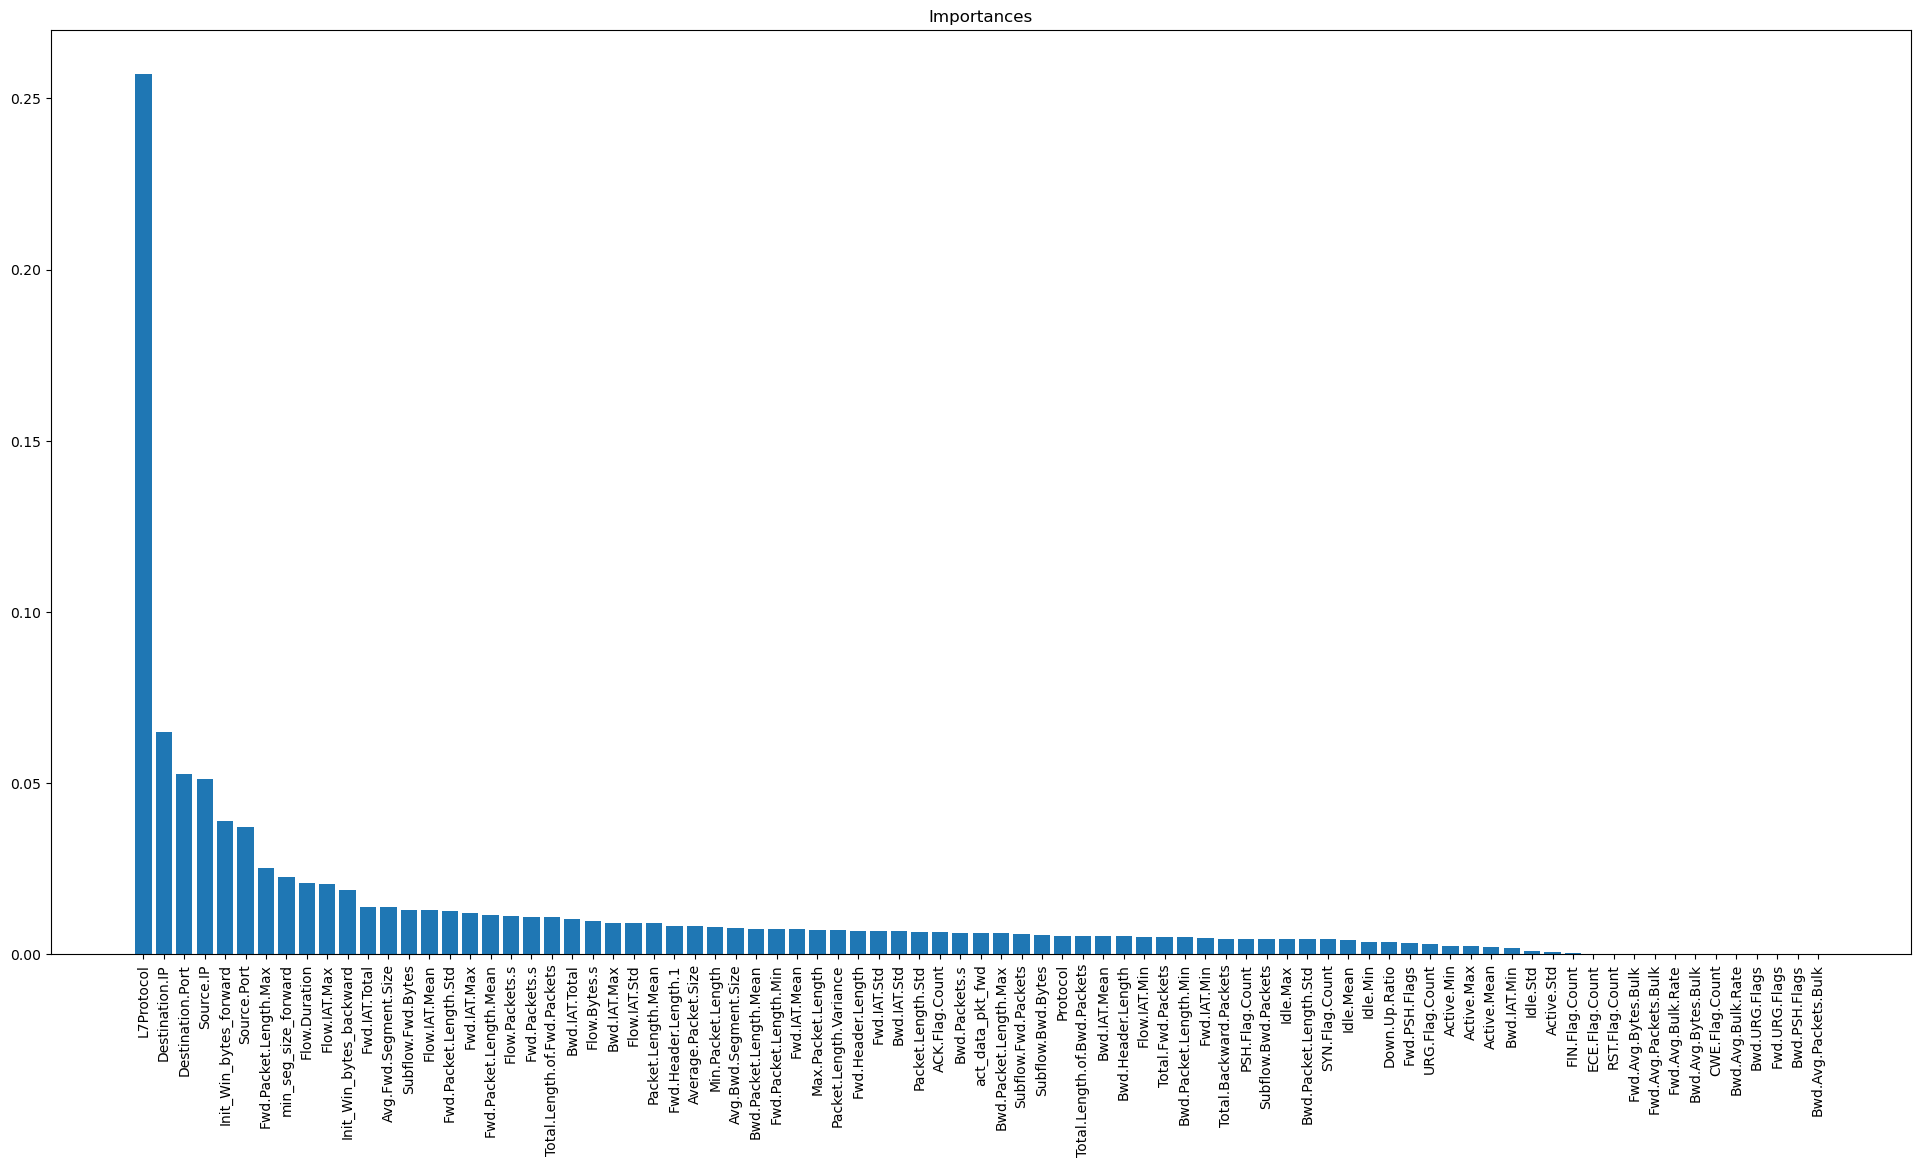

In [24]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [feats[i] for i in indices]
plt.figure(figsize=(24,12))
plt.title("Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.savefig("RF_features.png")